# Praktikum Maschinelles Lernen WS 15/16

 <table>
  <tr>
    <td>Name</td>
    <td>Vorname</td>
    <td>Matrikelnummer</td>
    <td>Datum</td>
  </tr>
  <tr>
    <td>Alt</td>
    <td>Tobias</td>
    <td>282385</td>
    <td>02.11.2015</td>
  </tr>
</table> 

## Aufgabe 2 - Datenvorverarbeitung mit Pandas

Import der Python Libraries

In [38]:
import pandas as pd
import numpy as np
import json
import zipfile
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
zipFile = open('foods-2011-10-03.json.zip', 'rb')
with zipfile.ZipFile('foods-2011-10-03.json.zip', "r") as jsonFile:
    jsonFile.extractall()

In [4]:
foodDB = json.load(open('foods-2011-10-03.json'))

In [5]:
len(foodDB)

6636

Zugriff auf den ersten Eintrag und Namen der Einträge ausgeben.

In [6]:
foodDB[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

Zugriff auf den ersten Eintrag in 'nutrients'

In [7]:
foodDB[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

Für den info DataFrame ein Feld der keys anlegen.<br>
Danach den Frame erstellen und den columns die keys zuweisen.

In [8]:
info_keys = ['description','group','id','manufacturer']

In [9]:
info = pd.DataFrame(foodDB, columns=info_keys)

Testausgabe mit den ersten 5 Einträgen

In [10]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Alle Nährstofflisten in ein Array von DataFrames konvertieren.<br>
Nahrungsmittel ID als Spalte anhängen. 

In [11]:
nutrients = []

for rec in foodDB:
    foodNutrients = pd.DataFrame(rec['nutrients'])
    foodNutrients['id'] = rec['id']
    nutrients.append(foodNutrients)


In [12]:
nutrients = pd.concat(nutrients, ignore_index=True)

Wieviele Duplikate sind enthalten ?

In [13]:
nutrients.duplicated().sum()

14179

Duplikate entfernen.

In [14]:
nutrients = nutrients.drop_duplicates()

describtion und group jeweils eindeutig umbenennen. 

In [15]:
col_mapping = {'description' : 'food',
               'group' : 'foodGroup'}

In [16]:
info = info.rename(columns=col_mapping, copy=False)

In [17]:
info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6636 entries, 0 to 6635
Data columns (total 4 columns):
food            6636 non-null object
foodGroup       6636 non-null object
id              6636 non-null int64
manufacturer    5195 non-null object
dtypes: int64(1), object(3)
memory usage: 259.2 KB


In [18]:
col_mapping = {'description' : 'nutrients',
               'group' : 'nutGroup'}

In [19]:
nutrients = nutrients.rename(columns=col_mapping, copy=False)

In [20]:
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
nutrients    375176 non-null object
nutGroup     375176 non-null object
units        375176 non-null object
value        375176 non-null float64
id           375176 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2 MB


Merge anhand der ID

In [21]:
allData = pd.merge(nutrients, info, on='id', how='outer')

In [22]:
allData.head()

,nutrients,nutGroup,units,value,id,food,foodGroup,manufacturer
0,Protein,Composition,g,25.18,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.20,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.06,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.28,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.00,1008,"Cheese, caraway",Dairy and Egg Products,


Alle Daten die Zink enthalten in ein Frame.

In [23]:
zincFrame = allData.loc[allData['nutrients'] == 'Zinc, Zn'] 

In [24]:
zincFrame.head()

,nutrients,nutGroup,units,value,id,food,foodGroup,manufacturer
14,"Zinc, Zn",Elements,mg,2.94,1008,"Cheese, caraway",Dairy and Egg Products,
75,"Zinc, Zn",Elements,mg,3.11,1009,"Cheese, cheddar",Dairy and Egg Products,
151,"Zinc, Zn",Elements,mg,3.75,1018,"Cheese, edam",Dairy and Egg Products,
222,"Zinc, Zn",Elements,mg,2.88,1019,"Cheese, feta",Dairy and Egg Products,
293,"Zinc, Zn",Elements,mg,2.76,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,


Edamer raussuchen

In [25]:

edamer = allData['food']=='Cheese, edam'
edamer = allData[edamer]
#find Edamer in Zinktable
edamer =edamer[edamer['nutrients']=='Zinc, Zn']
#print ID of Edamer
print 'ID of Edam:', int(edamer['id'])
edamer

ID of Edam: 1018


,nutrients,nutGroup,units,value,id,food,foodGroup,manufacturer
151,"Zinc, Zn",Elements,mg,3.75,1018,"Cheese, edam",Dairy and Egg Products,


Auswertung vom durchschnittlichen Zinkgehalt der einzelnen Nahrungsgruppen.<br>
value = mg

In [39]:
medZinc = allData.groupby(['nutrients', 'foodGroup'])['value'].mean()

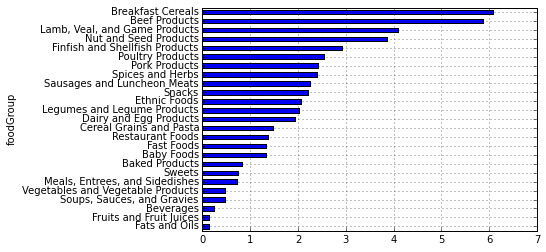

In [40]:
medZinc['Zinc, Zn'].order().plot(kind='barh')

In [41]:
medZinc['Zinc, Zn'].order()

foodGroup
Fats and Oils                        0.138556
Fruits and Fruit Juices              0.143196
Beverages                            0.239386
Soups, Sauces, and Gravies           0.467564
Vegetables and Vegetable Products    0.483308
Meals, Entrees, and Sidedishes       0.716585
Sweets                               0.743369
Baked Products                       0.822194
Baby Foods                           1.330622
Fast Foods                           1.336818
Restaurant Foods                     1.378627
Cereal Grains and Pasta              1.487363
Dairy and Egg Products               1.930396
Legumes and Legume Products          2.012952
Ethnic Foods                         2.063824
Snacks                               2.211039
Sausages and Luncheon Meats          2.247130
Spices and Herbs                     2.391220
Pork Products                        2.413720
Poultry Products                     2.549130
Finfish and Shellfish Products       2.918000
Nut and Seed Products   

In [42]:
histolist=[]
for element in zincFrame['value']:
    histolist.append(element)

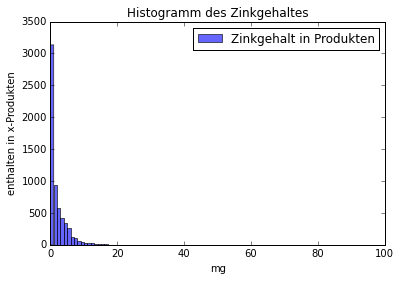

In [43]:
plt.hist(histolist,bins=90,alpha=0.6, label='Zinkgehalt in Produkten');
plt.title("Histogramm des Zinkgehaltes")
plt.xlabel("mg")
plt.ylabel("enthalten in x-Produkten")
plt.legend(loc='upper right')
plt.show()

Liste deskriptiver Statistiken

In [47]:
#Range of Value
print 'Range: from',min(histolist),'to', max(histolist)
#Mean(Durchschnitt)
print 'Mean:',np.mean(histolist)
#Median(Mittlerer Wert)
print 'Median:',np.median(histolist)
#Length of list
print 'Number of elements:',len(zincFrame)
print 'Number of unique Elements:',len(np.unique(histolist))
print 'frequency(Häufigkeit) of every different kategory:\n',zincFrame['value'].value_counts()
print  '\ndescribe:\n',zincFrame['value'].describe()

 Range: from 0.0 to 90.95
Mean: 2.22858888708
Median: 0.98
Number of elements: 6137
Number of unique Elements: 894
frequency(Häufigkeit) of every different kategory:
0.00    95
0.07    72
0.20    65
0.04    62
0.01    61
0.10    61
0.02    56
0.05    53
0.08    52
0.11    52
0.30    50
0.18    49
0.17    48
0.25    47
0.40    46
...
6.64     1
4.07     1
9.97     1
9.22     1
10.31    1
90.95    1
17.03    1
6.16     1
9.59     1
7.07     1
10.05    1
7.60     1
14.70    1
7.20     1
10.45    1
Length: 894, dtype: int64

describe:
count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64


Edamer über Durchschnitt ?

In [48]:
edamer['value']

151    3.75
Name: value, dtype: float64

In [50]:
print 'Durchschnitt ist:',np.mean(histolist)

 Durchschnitt ist: 2.22858888708


In [54]:
print 'Do 75% of all food have less zinc than Edam:', 'yes' if (zincFrame['value'].describe()['75%']<np.double(edamer['value'])) else 'no Edamer has %f and mean is: %f'%(double(edamer['value']),zinklist['value'].describe()['75%']);
#more than 75%
tmp = zincFrame['value']<np.double(edamer['value'])
tmp = zincFrame[tmp]
tmp = len(tmp)
prozent75 = 75* len(zincFrame) /100

print 'Do more than 75% of all food have less zinc than Edam:', 'yes' if (prozent75<tmp) else 'no';
print 'number of products less than Edam (%f):  %d products' %(np.double(edamer['value']),tmp);

 Do 75% of all food have less zinc than Edam: yes
Do more than 75% of all food have less zinc than Edam: yes
number of products less than Edam (3.750000):  4948 products


Maximales Zinkgehalt ??

In [55]:
listmax = zincFrame[zincFrame.value==zincFrame.value.max()] 
print 'Name of the product with the most zinc: ', listmax['food']
listmax

Name of the product with the most zinc:  333726    Mollusks, oyster, eastern, canned
Name: food, dtype: object


,nutrients,nutGroup,units,value,id,food,foodGroup,manufacturer
333726,"Zinc, Zn",Elements,mg,90.95,15170,"Mollusks, oyster, eastern, canned",Finfish and Shellfish Products,


In [60]:
%version_information pandas,numpy, scipy, matplotlib, sympy

Software versions
Python 2.7.10 64bit [GCC 5.2.1 20151010]
IPython 4.0.1
OS Linux 4.2.0 16 generic x86_64 with Ubuntu 15.10 wily
pandas 0.15.0
numpy 1.8.2
scipy 0.14.1
matplotlib 1.4.2
sympy 0.7.6
Tue Jan 12 16:00:00 2016 CET